In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Result for combined, 30S, single stock strategy
# df_pnl = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/all_strat_single_comb_log_ret_ex_update_30S.csv")


# Result for combined, 2min, single stock strategy
# df_pnl = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/trading_strat/all_strat_single_combined_log_ret_ex_momentum_2min.csv")
# Type = 'Unweighted'
# df_pnl = df_pnl[df_pnl['Type'] == Type]
# df_pnl.drop(columns=['Type'], inplace=True)
# df_pnl.rename(columns = {f"final_PnL_unweighted": "final_PnL"}, inplace=True)
# df_pnl.drop(columns = ['final_PnL_weighted'], inplace=True)

# Result for iceberg, 2min, single stock strategy
df_pnl = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/trading_strat/all_strat_single_ib_log_ret_ex_momentum_30min.csv")
Type = 'Unweighted'
df_pnl = df_pnl[df_pnl['Type'] == Type]
df_pnl.drop(columns=['Type'], inplace=True)
df_pnl.rename(columns = {f"final_PnL_unweighted": "final_PnL"}, inplace=True)
df_pnl.drop(columns = ['final_PnL_weighted'], inplace=True)


In [5]:
df_pnl.set_index('Ticker', inplace=True)
df_pnl.sort_values('final_PnL', ascending=False, inplace=True)

In [6]:
# Get overall PnL for each ticker, verify same as last column
np.round(np.sum(df_pnl.iloc[:, :-1].to_numpy(), axis=1) - df_pnl.iloc[:, -1].to_numpy(), 5)

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0.,  0.,  0.,  0., -0., -0.])

In [7]:
mean_tickers = df_pnl.iloc[:, 1: -1].mean(axis=1)
std_tickers = df_pnl.iloc[:, 1: -1].std(axis=1)

sharpe_ratio = mean_tickers / std_tickers * np.sqrt(252)

df_sharpe = pd.DataFrame({"ticker": df_pnl.index, "sharpe": sharpe_ratio})

In [8]:
df_sharpe
df_sharpe.set_index('ticker', inplace=True)
df_sharpe = df_sharpe.sort_values(by='sharpe', ascending=False)

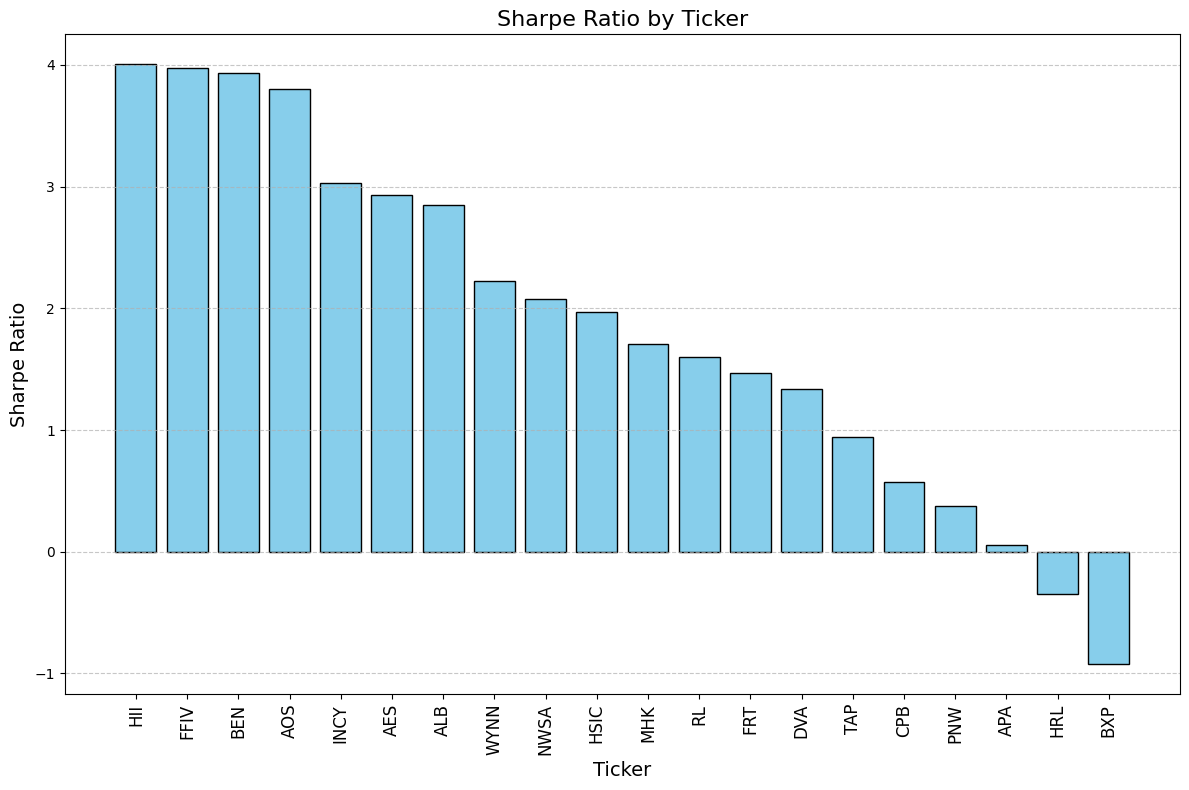

In [9]:
# Create the bar plot with enhancements
plt.figure(figsize=(12, 8))
plt.bar(df_sharpe.index, df_sharpe['sharpe'], color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Sharpe Ratio by Ticker', fontsize=16)
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('Sharpe Ratio', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=90, fontsize=12)

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

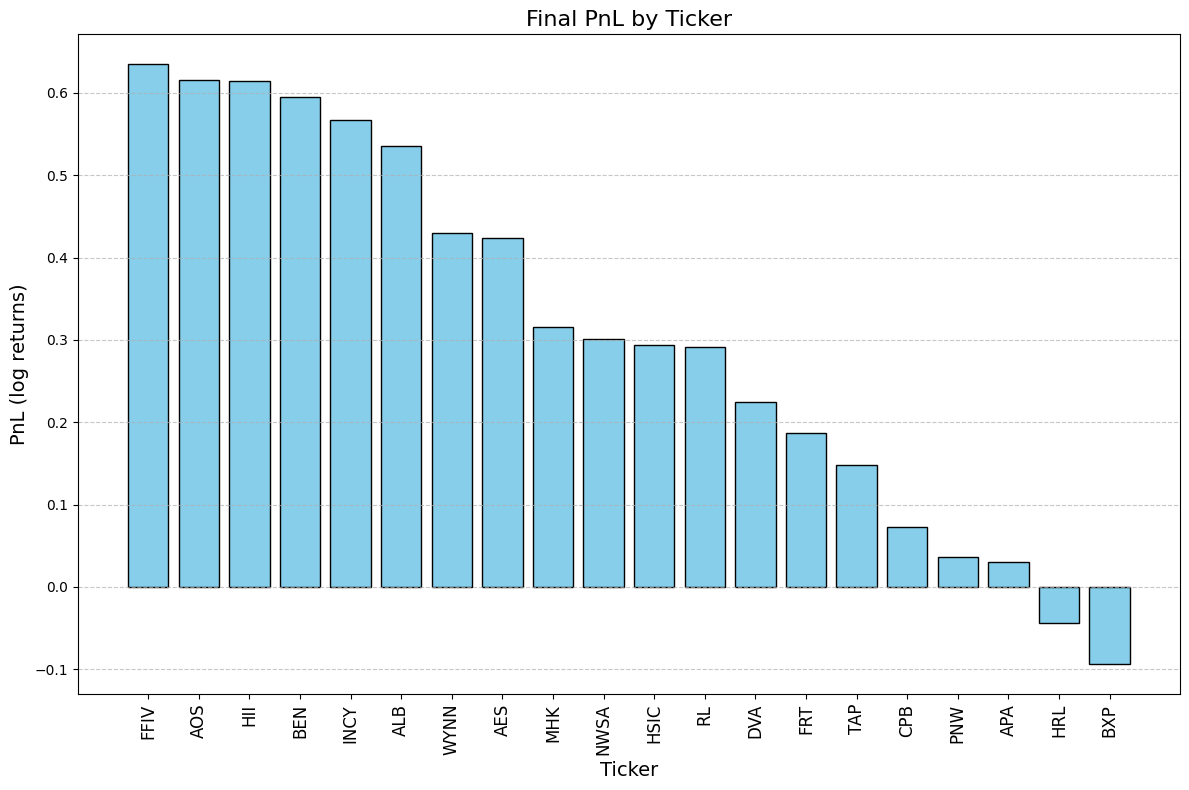

In [10]:
# Create the bar plot with enhancements
plt.figure(figsize=(12, 8))
plt.bar(df_pnl.index, df_pnl['final_PnL'], color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Final PnL by Ticker', fontsize=16)
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('PnL (log returns)', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=90, fontsize=12)

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

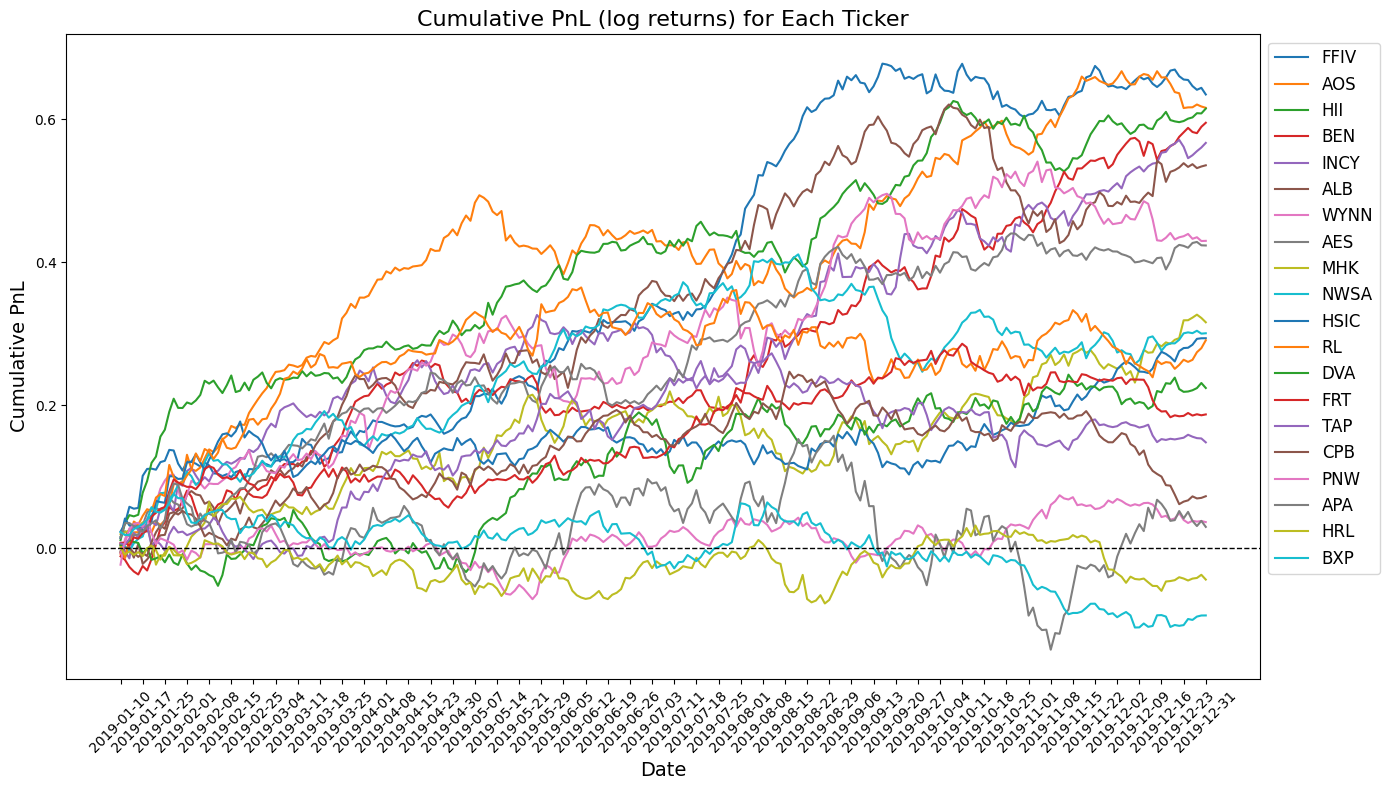

In [11]:
# Calculate cumulative PnL
cumulative_pnl = df_pnl.iloc[:, :-1].cumsum(axis=1)

# Plot cumulative PnL for each ticker
plt.figure(figsize=(14, 8))
for ticker in cumulative_pnl.index:
    plt.plot(cumulative_pnl.columns, cumulative_pnl.loc[ticker], label=ticker)


plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Add title and labels
plt.title('Cumulative PnL (log returns) for Each Ticker', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative PnL', fontsize=14)

# Rotate x-axis labels and reduce ticks
plt.xticks(ticks=range(0, len(cumulative_pnl.columns), 5), labels=cumulative_pnl.columns[::5], rotation=45)


# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to fit legend
plt.tight_layout()

# Show plot
plt.show()

In [12]:
df_simple_returns = np.exp(df_pnl.iloc[:, :-1]) - 1

# Calculate cumulative simple returns
df_cumulative_returns = ((1 + df_simple_returns).cumprod(axis=1) - 1) * 100

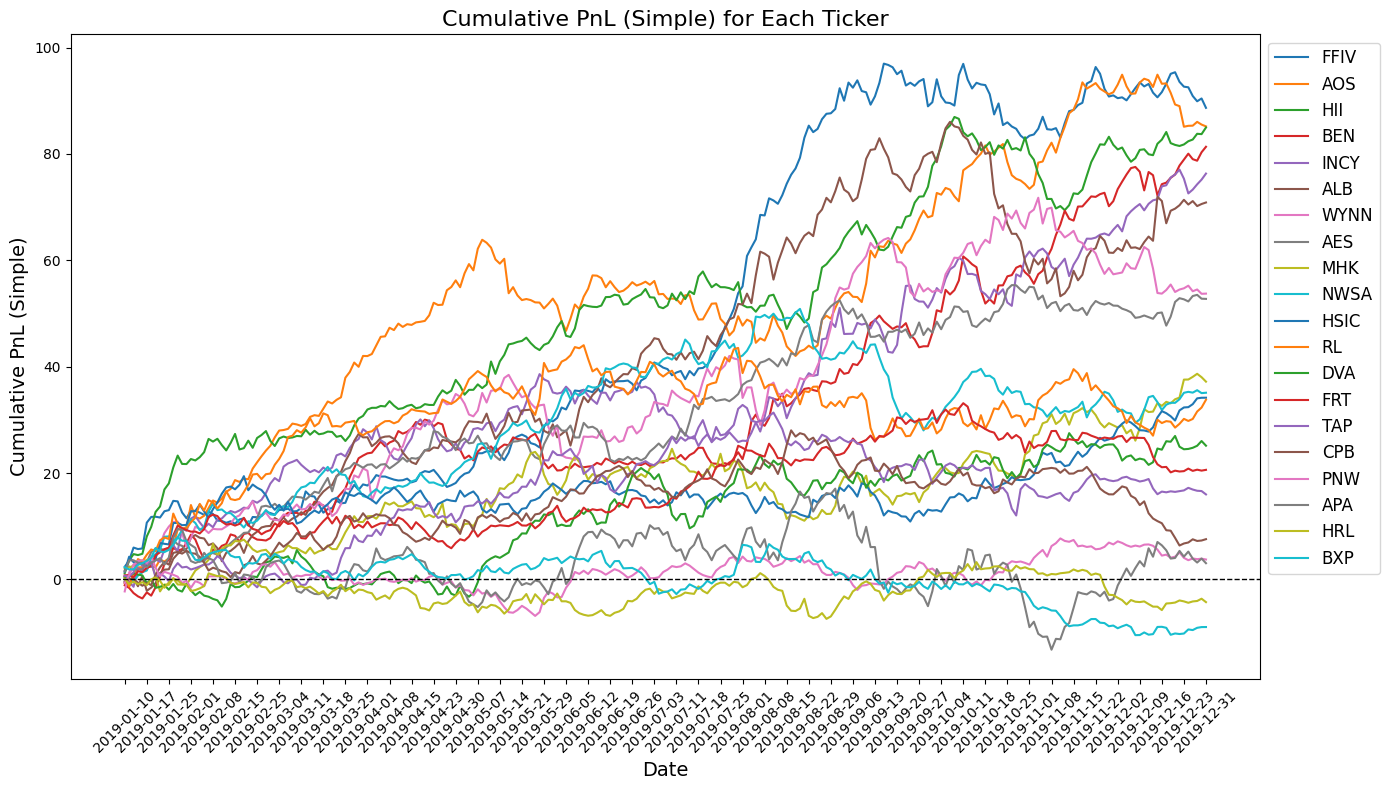

In [13]:
# Plot cumulative PnL for each ticker
plt.figure(figsize=(14, 8))
for ticker in df_cumulative_returns.index:
    plt.plot(df_cumulative_returns.columns, df_cumulative_returns.loc[ticker], label=ticker)


plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Add title and labels
plt.title('Cumulative PnL (Simple) for Each Ticker', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative PnL (Simple)', fontsize=14)

# Rotate x-axis labels and reduce ticks
plt.xticks(ticks=range(0, len(df_cumulative_returns.columns), 5), labels=df_cumulative_returns.columns[::5], rotation=45)


# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to fit legend
plt.tight_layout()

# Show plot
plt.show()

In [14]:
import numpy as np
from scipy.stats import norm
from scipy.stats import skew, kurtosis

def sharpe_test(returns):
    # Calculate the Sharpe ratio
    sharpe_ratio = np.mean(returns) / np.std(returns, ddof=1)
    
    # Number of observations
    T = len(returns)
    
    # Calculate skewness and kurtosis
    g3 = skew(returns)
    g4 = kurtosis(returns, fisher=False)  # fisher=False to match R's kurtosis (which includes the 3)
    
    # Calculate the modified Sharpe ratio statistic
    denominator = np.sqrt((1 - g3 * sharpe_ratio + (g4 - 1) * (sharpe_ratio ** 2) / 4) / (T - 1))
    modified_sharpe_stat = sharpe_ratio / denominator    
    # Calculate the two-tailed p-value
    p_value = 2 * min(norm.cdf(modified_sharpe_stat), 1 - norm.cdf(modified_sharpe_stat))

    annual_sharpe = np.sqrt(252) * sharpe_ratio
    
    return annual_sharpe, modified_sharpe_stat, p_value


In [15]:
# Example usage
sharpe_ratio_lst = []
p_value_lst = []
sharpe_test_lst = []


for i in range(len(df_pnl)):
    returns = df_pnl.iloc[i, :-1].to_numpy()
    sharpe_ratio, modified_sharpe_stat, p_value = sharpe_test(returns)
    p_value_lst.append(p_value)
    sharpe_test_lst.append(modified_sharpe_stat)
    sharpe_ratio_lst.append(sharpe_ratio)

In [16]:
df_SRtest = pd.DataFrame({'ticker': df_pnl.index.to_list(), "sharpe_ratio" : sharpe_ratio_lst, "sharpe_test_stat" :sharpe_test_lst, 'p_values': p_value_lst})
df_SRtest.sort_values(ascending=False, by="sharpe_ratio", inplace=True)

In [17]:
df_SRtest

,ticker,sharpe_ratio,sharpe_test_stat,p_values
0,FFIV,4.076989,4.221766,0.000024
2,HII,4.064565,4.008327,0.000061
3,BEN,3.838302,3.727576,0.000193
1,AOS,3.744382,3.650731,0.000261
4,INCY,3.057701,3.119287,0.001813
7,AES,3.021615,2.955774,0.003119
5,ALB,2.821725,2.692698,0.007088
9,NWSA,2.099302,2.040154,0.041335
6,WYNN,2.093975,1.963553,0.049582
10,HSIC,2.056878,2.067486,0.038688


In [18]:
def PPT(df_pnl, delta='30S'):
    day_trades = len(df_pnl.columns) - 1
    if delta == '30S':
        n_trades = 659
    if delta == '2min':
        n_trades = 164
    if delta == "10min":
        n_trades = 32
    if delta == '30min':
        n_trades = 10
    total_trades = n_trades * day_trades

    PPT = df_pnl.iloc[:, -1] / total_trades

    return PPT.to_frame()

In [17]:
PPT_df = PPT(df_pnl)
PPT_df = PPT_df * 10000
PPT_df.rename(columns={'final_PnL': 'PPT'}, inplace=True)

In [18]:
PPT_df

,PPT
Ticker,
HII,0.400868
MHK,0.365657
RL,0.249822
NWSA,0.216813
AES,0.212345
FFIV,0.198367
DVA,0.192000
BXP,0.173005
TAP,0.170587


In [19]:
ticker_order = ['HII','MHK','AES','BXP','NWSA','RL','FFIV','DVA','FRT','TAP','PNW','BEN','WYNN','INCY','AOS','ALB','HRL','CPB','HSIC','APA']

In [20]:
df_SRtest.set_index('ticker', inplace=True)
df_SRtest = df_SRtest.reindex(ticker_order)
df_SRtest = df_SRtest.merge(PPT_df, left_index=True, right_index=True)
df_SRtest.drop(columns=['p_values'])

,sharpe_ratio,sharpe_test_stat,PPT
HII,19.453470,16.903128,0.400868
MHK,17.440236,13.194629,0.365657
AES,14.594255,13.090806,0.212345
BXP,11.453345,8.413637,0.173005
NWSA,12.641257,11.667753,0.216813
RL,11.616270,10.017115,0.249822
FFIV,12.284952,9.566614,0.198367
DVA,10.265574,6.935520,0.192000
FRT,10.000271,9.528766,0.158385
TAP,10.917442,8.539439,0.170587


In [30]:
import yfinance as yf
import pandas as pd
import numpy as np

def get_excess_log_returns(ticker, dates):
    """
    Calculate the market excess log Close to Open returns for a given ticker against SPY for a set of dates.

    Parameters:
    ticker (str): The stock ticker symbol.
    dates (list of str): List of dates in 'YYYY-MM-DD' format.

    Returns:
    pd.Series: Series of excess log Close to Open returns indexed by the input dates.
    """
    
    # Fetch historical data for both the ticker and SPY
    data = yf.download([ticker, 'SPY'], start=min(dates), end=max(dates))
    
    # Separate the ticker data and SPY data
    ticker_data = data['Adj Close'][ticker]
    spy_data = data['Adj Close']['SPY']
    
    # Calculate log returns for Close to Open
    ticker_data['Close_to_Open_Log_Return'] = np.log(data['Open'][ticker].shift(-1) / data['Close'][ticker])
    spy_data['Close_to_Open_Log_Return'] = np.log(data['Open']['SPY'].shift(-1) / data['Close']['SPY'])
    
    # Calculate excess log returns (Ticker log returns - SPY log returns)
    excess_log_returns = ticker_data['Close_to_Open_Log_Return'] - spy_data['Close_to_Open_Log_Return']
    
    # Filter the returns for the specified dates
    filtered_excess_returns = excess_log_returns[dates]
    
    # Drop any NaN values (e.g., because the next day's open is missing)
    filtered_excess_returns = filtered_excess_returns.dropna()
    
    return filtered_excess_returns


In [34]:
# Example usage:
ticker = 'AAPL'
dates = ['2019-02-07']
excess_returns = get_excess_log_returns(ticker, dates)
print(excess_returns)

[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['SPY', 'AAPL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2019-02-07 -> 2019-02-07)')


$SPY: possibly delisted; No price data found  (1d 2019-02-07 -> 2019-02-07)
$AAPL: possibly delisted; No price data found  (1d 2019-02-07 -> 2019-02-07)


/tmp/ipykernel_2094155/2486105735.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Close_to_Open_Log_Return'] = np.log(data['Open'][ticker].shift(-1) / data['Close'][ticker])
/tmp/ipykernel_2094155/2486105735.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy_data['Close_to_Open_Log_Return'] = np.log(data['Open']['SPY'].shift(-1) / data['Close']['SPY'])


KeyError: "None of [Index(['2019-02-07'], dtype='object', name='Date')] are in the [index]"